In [55]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [56]:
df=pd.read_csv("Group10 - missingdata.csv")
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Condition                         111 non-null    object 
 1   Cylinder heating zone 1           105 non-null    float64
 2   Cylinder heating zone 4           105 non-null    float64
 3   Maximum injection pressure        104 non-null    float64
 4   Mould temperature control unit 1  105 non-null    float64
 5   Cycle time                        105 non-null    float64
 6   Cylinder heating zone 5           105 non-null    float64
 7   Injection time                    105 non-null    float64
 8   Cylinder heating zone 2           103 non-null    float64
 9   Dosage time                       105 non-null    float64
 10  Cylinder heating zone 3           104 non-null    float64
 11  Switch-over volume                105 non-null    float64
 12  Material

In [57]:
df.isnull().sum()

Condition                           0
Cylinder heating zone 1             6
Cylinder heating zone 4             6
Maximum injection pressure          7
Mould temperature control unit 1    6
Cycle time                          6
Cylinder heating zone 5             6
Injection time                      6
Cylinder heating zone 2             8
Dosage time                         6
Cylinder heating zone 3             7
Switch-over volume                  6
Material cushion                    6
dtype: int64

In [58]:
print(df['Condition'].nunique())
print(df['Condition'].unique())

3
['Normal1' 'Condition1' 'Condition5']


In [59]:
#To fill in missing values
knnimputer=KNNImputer(n_neighbors=3)
cond=df['Condition']
df=df.drop('Condition',axis=1)
df2=df.values
dff=knnimputer.fit_transform(df2)
dff = pd.DataFrame(dff, columns=df.columns)
dff.insert(0,'Condition',cond)
print(dff.isnull().sum())


Condition                           0
Cylinder heating zone 1             0
Cylinder heating zone 4             0
Maximum injection pressure          0
Mould temperature control unit 1    0
Cycle time                          0
Cylinder heating zone 5             0
Injection time                      0
Cylinder heating zone 2             0
Dosage time                         0
Cylinder heating zone 3             0
Switch-over volume                  0
Material cushion                    0
dtype: int64


In [60]:
#Replacing outliers with median values
dff = dff.drop('Condition', axis=1)
no_cols = dff.select_dtypes(include=np.number).columns

for col in no_cols:
    data = dff[col]
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = np.where((data < lower_bound) | (data > upper_bound))[0]
    dff.loc[outliers, col] = np.median(data)

print(dff)


     Cylinder heating zone 1  Cylinder heating zone 4  \
0                     270.68                   313.04   
1                     274.66                   300.09   
2                     279.79                   312.79   
3                     284.84                   313.57   
4                     275.39                   305.86   
..                       ...                      ...   
106                   271.11                   302.89   
107                   278.28                   307.68   
108                   293.42                   299.75   
109                   286.93                   312.87   
110                   290.33                   325.28   

     Maximum injection pressure  Mould temperature control unit 1  Cycle time  \
0                       1471.99                         88.560000      28.940   
1                       1557.26                         93.670000      28.628   
2                       1421.44                         93.850000      3

In [61]:

dff.insert(0,'Condition',cond)

In [62]:
print(dff)

      Condition  Cylinder heating zone 1  Cylinder heating zone 4  \
0       Normal1                   270.68                   313.04   
1       Normal1                   274.66                   300.09   
2       Normal1                   279.79                   312.79   
3       Normal1                   284.84                   313.57   
4       Normal1                   275.39                   305.86   
..          ...                      ...                      ...   
106  Condition5                   271.11                   302.89   
107  Condition5                   278.28                   307.68   
108  Condition5                   293.42                   299.75   
109  Condition5                   286.93                   312.87   
110  Condition5                   290.33                   325.28   

     Maximum injection pressure  Mould temperature control unit 1  Cycle time  \
0                       1471.99                         88.560000      28.940   
1        

In [63]:
#STATISTICAL ANALYSIS




In [64]:
conditions = ['Normal1', 'Condition1', 'Condition5']

for condition in conditions:
    print("Condition:", condition)
    condition_data = dff[dff['Condition'] == condition][no_cols]

    stat_df = condition_data.describe().loc[['mean', '50%', 'std', 'min', '25%', '75%', 'max'], :]
    stat_df.loc['range'] = stat_df.loc['max'] - stat_df.loc['min']
    print(tabulate(stat_df, headers='keys',tablefmt='fancy_grid'))


Condition: Normal1
╒═══════╤═══════════════════════════╤═══════════════════════════╤══════════════════════════════╤════════════════════════════════════╤══════════════╤═══════════════════════════╤══════════════════╤═══════════════════════════╤═══════════════╤═══════════════════════════╤══════════════════════╤════════════════════╕
│       │   Cylinder heating zone 1 │   Cylinder heating zone 4 │   Maximum injection pressure │   Mould temperature control unit 1 │   Cycle time │   Cylinder heating zone 5 │   Injection time │   Cylinder heating zone 2 │   Dosage time │   Cylinder heating zone 3 │   Switch-over volume │   Material cushion │
╞═══════╪═══════════════════════════╪═══════════════════════════╪══════════════════════════════╪════════════════════════════════════╪══════════════╪═══════════════════════════╪══════════════════╪═══════════════════════════╪═══════════════╪═══════════════════════════╪══════════════════════╪════════════════════╡
│ mean  │                 281.27    │        

In [65]:
label=LabelEncoder()
dff=dff.drop("Condition",axis=1)
condI=label.fit_transform(cond)
dff.insert(0,'Condition',condI)
print(dff)

     Condition  Cylinder heating zone 1  Cylinder heating zone 4  \
0            2                   270.68                   313.04   
1            2                   274.66                   300.09   
2            2                   279.79                   312.79   
3            2                   284.84                   313.57   
4            2                   275.39                   305.86   
..         ...                      ...                      ...   
106          1                   271.11                   302.89   
107          1                   278.28                   307.68   
108          1                   293.42                   299.75   
109          1                   286.93                   312.87   
110          1                   290.33                   325.28   

     Maximum injection pressure  Mould temperature control unit 1  Cycle time  \
0                       1471.99                         88.560000      28.940   
1                    

In [66]:
#VISUALIZATIONS
import plotly.express as px
colors = px.colors.qualitative.Plotly

for i, col in enumerate(no_cols):
    color_index = i % len(colors)
    fig = px.line(df, x=df.index, y=col, title="Line Chart of " + col)
    fig.update_traces(mode='lines+markers', marker=dict(size=5), line=dict(color=colors[color_index]))

    fig.update_layout(
        hovermode='closest',
        xaxis=dict(title="Number of Individual Entries"),
        yaxis=dict(title=str(col)),
        showlegend=True
    )

    fig.show()

In [67]:

colors = px.colors.qualitative.Plotly
for i, col in enumerate(no_cols):
    color_index = i % len(colors)
    fig = px.histogram(df, x=col, nbins=20, title="Histogram of " + col, color_discrete_sequence=[colors[color_index]])

    fig.update_layout(
        xaxis=dict(title="Number of Individual Entries"),
        yaxis=dict(title="Frequency"),
        showlegend=False
    )

    # Add annotations
    for trace in fig.data:
        if trace.y is not None:
            for bar in trace.y:
                fig.add_annotation(x=trace.x[0] + (trace.x[1] - trace.x[0]) / 2, y=bar, text=str(bar), showarrow=False)

    # Set outline color for each bar
    fig.update_traces(marker_line_color=colors[color_index], selector=dict(type='histogram'))

    fig.show()

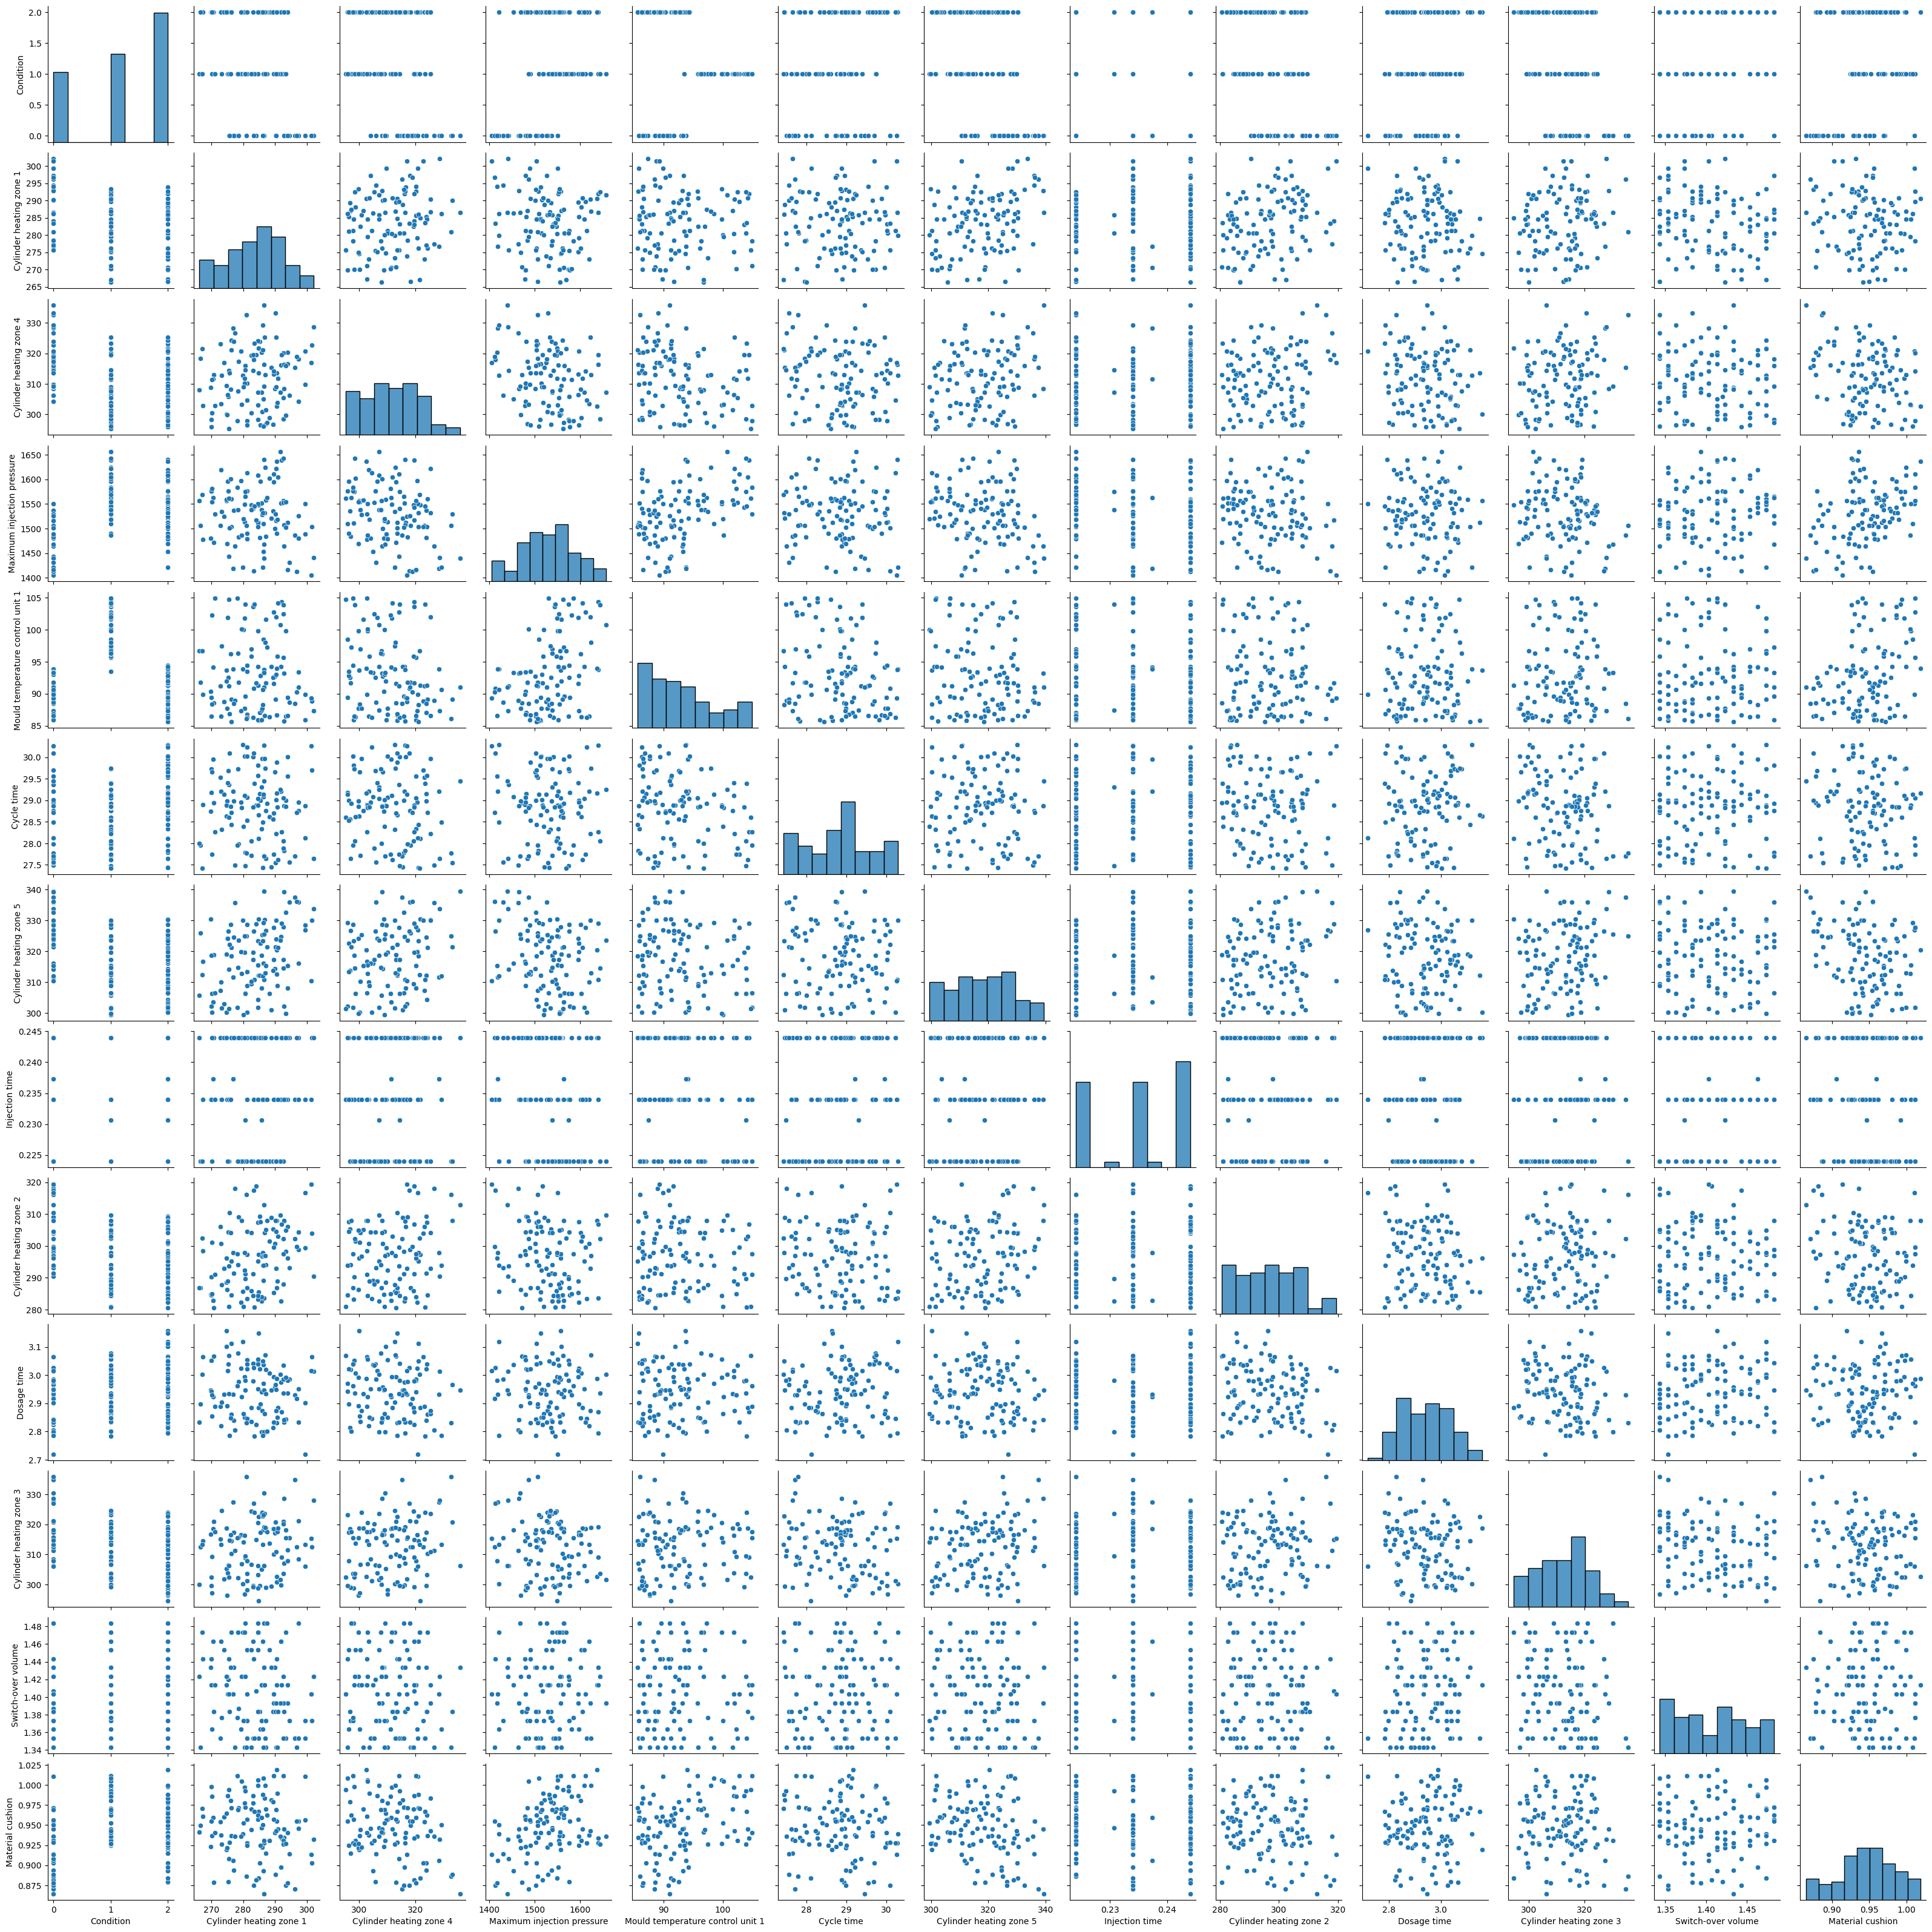

In [68]:
sns.pairplot(dff)

In [69]:
dff.corr()

,Condition,Cylinder heating zone 1,Cylinder heating zone 4,Maximum injection pressure,Mould temperature control unit 1,Cycle time,Cylinder heating zone 5,Injection time,Cylinder heating zone 2,Dosage time,Cylinder heating zone 3,Switch-over volume,Material cushion
Condition,1.000000,-0.363281,-0.319545,0.373376,-0.151131,0.229870,-0.385422,-0.109396,-0.409883,0.249914,-0.391773,0.202432,0.205722
Cylinder heating zone 1,-0.363281,1.000000,0.152703,-0.119332,-0.054053,-0.039647,0.339302,0.056760,0.327710,-0.088119,0.179288,-0.168979,-0.088473
Cylinder heating zone 4,-0.319545,0.152703,1.000000,-0.275242,-0.242624,-0.120138,0.261678,0.131578,0.175650,-0.154088,0.200725,-0.095044,-0.240347
Maximum injection pressure,0.373376,-0.119332,-0.275242,1.000000,0.412129,-0.059595,-0.239512,-0.142267,-0.153512,-0.073493,-0.154095,0.081429,0.366779
Mould temperature control unit 1,-0.151131,-0.054053,-0.242624,0.412129,1.000000,-0.255854,-0.159869,-0.170737,-0.072268,0.003352,0.040678,0.046366,0.356017
Cycle time,0.229870,-0.039647,-0.120138,-0.059595,-0.255854,1.000000,-0.035098,0.112483,-0.081081,0.121709,-0.192020,0.049596,-0.076228
Cylinder heating zone 5,-0.385422,0.339302,0.261678,-0.239512,-0.159869,-0.035098,1.000000,0.106111,0.235368,-0.076650,0.228827,-0.062120,-0.243026
Injection time,-0.109396,0.056760,0.131578,-0.142267,-0.170737,0.112483,0.106111,1.000000,-0.037899,0.005300,0.100660,-0.121151,-0.072106
Cylinder heating zone 2,-0.409883,0.327710,0.175650,-0.153512,-0.072268,-0.081081,0.235368,-0.037899,1.000000,-0.180768,0.125798,-0.068363,-0.157689
Dosage time,0.249914,-0.088119,-0.154088,-0.073493,0.003352,0.121709,-0.076650,0.005300,-0.180768,1.000000,-0.161369,0.141274,0.036749


In [70]:
from scipy.stats import pearsonr
from tabulate import tabulate

correlation_data = []
for column in dff.drop('Condition', axis=1):
    correlation_coefficient, p_value = pearsonr(dff['Condition'], dff[column])
    correlation_data.append([column, correlation_coefficient, p_value])

table_headers = ["Attribute", "Correlation Coefficient", "p-value"]
table = tabulate(correlation_data, headers=table_headers, tablefmt="grid")

print(table)


+----------------------------------+---------------------------+-------------+
| Attribute                        |   Correlation Coefficient |     p-value |
+==================================+===========================+=============+
| Cylinder heating zone 1          |                 -0.363281 | 8.89757e-05 |
+----------------------------------+---------------------------+-------------+
| Cylinder heating zone 4          |                 -0.319545 | 0.000629457 |
+----------------------------------+---------------------------+-------------+
| Maximum injection pressure       |                  0.373376 | 5.43236e-05 |
+----------------------------------+---------------------------+-------------+
| Mould temperature control unit 1 |                 -0.151131 | 0.113342    |
+----------------------------------+---------------------------+-------------+
| Cycle time                       |                  0.22987  | 0.0152239   |
+----------------------------------+----------------

<Axes: >

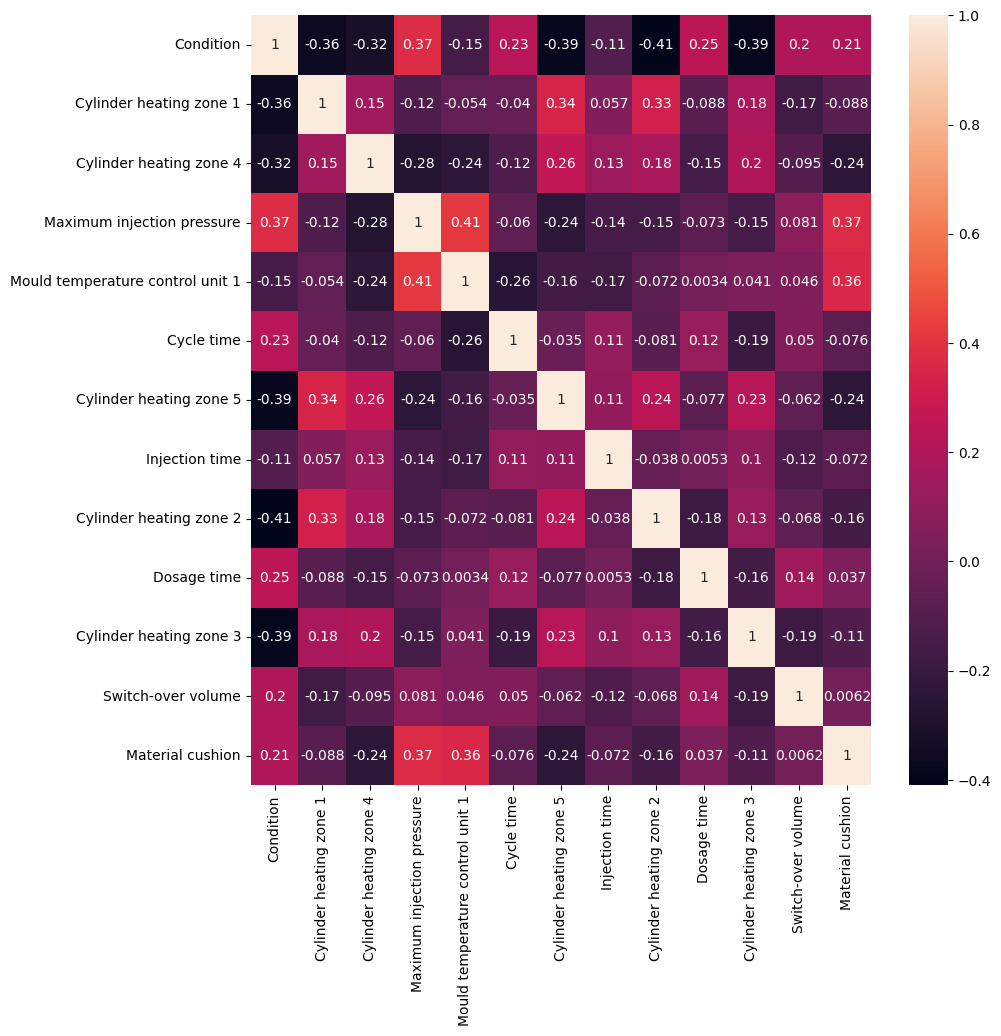

In [71]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(dff.corr(), annot=True, ax=ax)

In [72]:
scaler=MinMaxScaler()

dff[no_cols]=scaler.fit_transform(dff[no_cols])

In [73]:

y=dff['Condition']
X=dff.drop('Condition',axis=1)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
models = [LogisticRegression(), DecisionTreeClassifier(), SVC(), KNeighborsClassifier(), GaussianNB(), MLPClassifier()]

scoring = {'accuracy': 'accuracy',
           'precision': 'precision_macro',
           'recall': 'recall_macro',
           'f1': 'f1_macro'}

best_model = None
best_scores = {
    'accuracy': 0.0,
    'precision': 0.0,
    'recall': 0.0,
    'f1': 0.0
}

for model in models:
    scores = cross_validate(model, X, y, cv=5, scoring=scoring)
    accuracy = scores['test_accuracy'].mean()
    precision = scores['test_precision'].mean()
    recall = scores['test_recall'].mean()
    f1 = scores['test_f1'].mean()

    print(str(model))
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-score:', f1)
    print('------------------------------')

    # Update best scores and model if necessary
    if accuracy > best_scores['accuracy']:
        best_scores = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }
        best_model = model

print('Best Model:', str(best_model))
print('Best Scores:', best_scores)


LogisticRegression()
Accuracy: 0.9094861660079051
Precision: 0.9291319791319792
Recall: 0.906031746031746
F1-score: 0.9103544984551849
------------------------------
DecisionTreeClassifier()
Accuracy: 0.8193675889328063
Precision: 0.8214814814814815
Recall: 0.8222222222222222
F1-score: 0.8150827157019107
------------------------------
SVC()
Accuracy: 0.8280632411067194
Precision: 0.851074481074481
Recall: 0.8092063492063492
F1-score: 0.8215079123774774
------------------------------
KNeighborsClassifier()
Accuracy: 0.8193675889328063
Precision: 0.8242520442520442
Recall: 0.8015873015873016
F1-score: 0.8053541000909423
------------------------------
GaussianNB()
Accuracy: 0.8913043478260869
Precision: 0.9078787878787878
Recall: 0.8838095238095238
F1-score: 0.8904858104858105
------------------------------
MLPClassifier()
Accuracy: 0.9098814229249012
Precision: 0.9250505050505051
Recall: 0.9098412698412698
F1-score: 0.9122184637974111
------------------------------
Best Model: MLPClassif

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings

# Ignore warning messages
warnings.filterwarnings('ignore')
# Define the hyperparameters to tune
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga']
}

# Create the Logistic Regression model
model = LogisticRegression()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the data to perform the grid search
grid_search.fit(X, y)

# Print the best parameters and best score
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)


Best Parameters: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.9280632411067193


In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Define the hyperparameters to tune
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'logistic'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
}

# Create the MLPClassifier model
model = MLPClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the data to perform the grid search
grid_search.fit(X, y)

# Print the best parameters and best score
print('Best Parameters:', grid_search.best_params_)
print('Best Score:', grid_search.best_score_)


Best Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
Best Score: 0.8920948616600791
